<a href="https://colab.research.google.com/github/JensBlack/MultiAgentBehavior-Challenge/blob/main/MABe_Task_2_Annotation_Style_Transfer_Starter_Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![AIcrowd-Logo](https://images.aicrowd.com/raw_images/challenges/banner_file/756/6ad19f6aceefeb36f569.jpg)



<p align="center"> Join the communty! <br><a href="https://discord.gg/GTckBMx"><img src="https://img.shields.io/discord/657211973435392011?style=for-the-badge" alt="chat on Discord"></a>
</p>

<h1> <center>
🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁<br>
🐀 MABe Annotation Style Transfer: Starter kit 🐁<br>
🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐀🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁
</center>
</h1>

<p align="center"><img src="https://images.aicrowd.com/uploads/ckeditor/pictures/325/content_task2_structure.png">
<img src="https://images.aicrowd.com/uploads/ckeditor/pictures/326/content_task0_structure.png">
</p>

# How to use this notebook 📝

1. **Copy the notebook**. This is a shared template and any edits you make here will not be saved. _You should copy it into your own drive folder._ For this, click the "File" menu (top-left), then "Save a Copy in Drive". You can edit your copy however you like.
2. **Link it to your AIcrowd account**. In order to submit your predictions to AIcrowd, you need to provide your account's API key.



# Setup AIcrowd Utilities 🛠

In [ ]:
!pip install -U aicrowd-cli==0.1 > /dev/null 

# Install packages 🗃

Please add all pacakages installations in this section

In [ ]:
!pip install numpy pandas

# Import necessary modules and packages 📚


In [ ]:
import pandas as pd
import numpy as np
import os

# Download the dataset 📲

Please get your API key from https://www.aicrowd.com/participants/me


In [ ]:
API_KEY = ""
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge mabe-task-2-annotation-style-transfer

test-release.npy: 100% 1.83G/1.83G [02:09<00:00, 14.1MB/s]
sample-submission.npy: 100% 65.4M/65.4M [00:04<00:00, 13.5MB/s]
train.npy: 100% 135M/135M [00:08<00:00, 15.2MB/s]


Extract the downloaded dataset to `data` directory


In [ ]:
!rm -rf data
!mkdir data
 
!mv train.npy data/train.npy
!mv test-release.npy data/test.npy
!mv sample-submission.npy data/sample_submission.npy

# Load Data
The dataset files are python dictionaries, [this](https://colab.research.google.com/drive/1ddCX-TAdEcsUaGf09f5Glgr_G57FMK_O#scrollTo=JPsfxdl2GMcM&line=18&uniqifier=1) is a descirption of how the data is organized.



In [ ]:
train = np.load('data/train.npy',allow_pickle=True).item()
test = np.load('data/test.npy',allow_pickle=True).item()
sample_submission = np.load('data/sample_submission.npy',allow_pickle=True).item()

## Dataset Specifications 💾

-   **`train.npy`** - Training set for the task, which follows the following schema:

<p align="left" style="padding: 30px">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img width="600px" src="https://i.imgur.com/GddvoT2.png">
</p>


-   **`test-release.npy`** - Test set for the task, which follows the following schema :

<p align="left" style="padding: 30px">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img width="600px" src="https://i.imgur.com/vfa8Y4V.png">
</p>

-   **`sample_submission.npy`** - Template for a sample submission which follows the following schema

```json
{
    "<sequence_id-1>" : [0, 0, 1, 2, ...],
    "<sequence_id-2>" : [0, 1, 2, 0, ...]
}
```

Each key in the dictionary here refers to the unique sequence id obtained for the sequences in the test set.
The value for each of the keys is expected to hold a list of corresponing annotations. The annotations are represented by the index of the corresponding annotation words in the vocabular provided in the test set.

## How does the data look like? 🔍

### Data overview

In [ ]:
print("Dataset keys - ", train.keys())
print("Vocabulary - ", train['vocabulary'])
print("Number of train Sequences - ", len(train['sequences']))
print("Number of test Sequences - ", len(test['sequences']))

Dataset keys -  dict_keys(['vocabulary', 'sequences'])
Vocabulary -  {'attack': 0, 'investigation': 1, 'mount': 2, 'other': 3}
Number of train Sequences -  30
Number of test Sequences -  458


### Sample overview

In [ ]:
sequence_names = list(train["sequences"].keys())
sequence_key = sequence_names[0]
single_sequence = train["sequences"][sequence_key]
print("Sequence name - ", sequence_key)
print("Single Sequence keys", single_sequence.keys())
print(f"Number of Frames in {sequence_key} - ", len(single_sequence['annotations']))
print(f"Keypoints data shape of {sequence_key} - ", single_sequence['keypoints'].shape)
print(f"annotator_id of {sequence_key} - ", single_sequence['annotator_id'])

Sequence name -  43b6e939bd
Single Sequence keys dict_keys(['keypoints', 'annotator_id', 'annotations'])
Number of Frames in 43b6e939bd -  17415
Keypoints data shape of 43b6e939bd -  (17415, 2, 2, 7)
annotator_id of 43b6e939bd -  1


## Whats different in Task 2
Task 2 is all about transferring the style of annotation for the same behaviors. The dataset contains "annotator_id" for each sequence.


In [ ]:
def anno_id_counts(dataset):
  all_annotator_ids = [dataset["sequences"][k]['annotator_id'] for k in dataset["sequences"]]
  unique_annotator_ids, annotator_id_counts = np.unique(all_annotator_ids, return_counts=True)
  for uaid, aic in zip(unique_annotator_ids, annotator_id_counts):
      print(f"Annotator id: {uaid} |  Number of sequences: {aic}")
  
print("Train")
anno_id_counts(train)
print()
print("Test")
anno_id_counts(test)  

Train
Annotator id: 1 |  Number of sequences: 6
Annotator id: 2 |  Number of sequences: 6
Annotator id: 3 |  Number of sequences: 6
Annotator id: 4 |  Number of sequences: 6
Annotator id: 5 |  Number of sequences: 6

Test
Annotator id: 0 |  Number of sequences: 411
Annotator id: 1 |  Number of sequences: 13
Annotator id: 2 |  Number of sequences: 6
Annotator id: 3 |  Number of sequences: 4
Annotator id: 4 |  Number of sequences: 4
Annotator id: 5 |  Number of sequences: 20


# Helper function for visualization 💁




Don't forget to run the cell 😉

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import rc
 
rc('animation', html='jshtml')
 
# Note: Image processing may be slow if too many frames are animated.                
 
#Plotting constants
FRAME_WIDTH_TOP = 1024
FRAME_HEIGHT_TOP = 570
 
RESIDENT_COLOR = 'lawngreen'
INTRUDER_COLOR = 'skyblue'
 
PLOT_MOUSE_START_END = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4),
                        (3, 5), (4, 6), (5, 6), (1, 2)]
 
class_to_color = {'other': 'white', 'attack' : 'red', 'mount' : 'green',
                  'investigation': 'orange'}
 
class_to_number = {s: i for i, s in enumerate(train['vocabulary'])}
 
number_to_class = {i: s for i, s in enumerate(train['vocabulary'])}
 
def num_to_text(anno_list):
  return np.vectorize(number_to_class.get)(anno_list)
 
def set_figax():
    fig = plt.figure(figsize=(6, 4))
 
    img = np.zeros((FRAME_HEIGHT_TOP, FRAME_WIDTH_TOP, 3))
 
    ax = fig.add_subplot(111)
    ax.imshow(img)
 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
 
    return fig, ax
 
def plot_mouse(ax, pose, color):
    # Draw each keypoint
    for j in range(7):
        ax.plot(pose[j, 0], pose[j, 1], 'o', color=color, markersize=5)
 
    # Draw a line for each point pair to form the shape of the mouse
 
    for pair in PLOT_MOUSE_START_END:
        line_to_plot = pose[pair, :]
        ax.plot(line_to_plot[:, 0], line_to_plot[
                :, 1], color=color, linewidth=1)
 
def animate_pose_sequence(video_name, keypoint_sequence, start_frame = 0, stop_frame = 100, 
                          annotation_sequence = None):
    # Returns the animation of the keypoint sequence between start frame
    # and stop frame. Optionally can display annotations.
    seq = keypoint_sequence.transpose((0,1,3,2))
 
    image_list = []
    
    counter = 0
    for j in range(start_frame, stop_frame):
        if counter%20 == 0:
          print("Processing frame ", j)
        fig, ax = set_figax()
        plot_mouse(ax, seq[j, 0, :, :], color=RESIDENT_COLOR)
        plot_mouse(ax, seq[j, 1, :, :], color=INTRUDER_COLOR)
        
        if annotation_sequence is not None:
          annot = annotation_sequence[j]
          annot = number_to_class[annot]
          plt.text(50, -20, annot, fontsize = 16, 
                   bbox=dict(facecolor=class_to_color[annot], alpha=0.5))
 
        ax.set_title(
            video_name + '\n frame {:03d}.png'.format(j))
 
        ax.axis('off')
        fig.tight_layout(pad=0)
        ax.margins(0)
 
        fig.canvas.draw()
        image_from_plot = np.frombuffer(fig.canvas.tostring_rgb(),
                                        dtype=np.uint8)
        image_from_plot = image_from_plot.reshape(
            fig.canvas.get_width_height()[::-1] + (3,)) 
 
        image_list.append(image_from_plot)
 
        plt.close()
        counter = counter + 1
 
    # Plot animation.
    fig = plt.figure()
    plt.axis('off')
    im = plt.imshow(image_list[0])
 
    def animate(k):
        im.set_array(image_list[k])
        return im,
    ani = animation.FuncAnimation(fig, animate, frames=len(image_list), blit=True)
    return ani
 
def plot_annotation_strip(annotation_sequence, start_frame = 0, stop_frame = 100, title="Behavior Labels"):
  # Plot annotations as a annotation strip.
 
  # Map annotations to a number.
  annotation_num = []
  for item in annotation_sequence[start_frame:stop_frame]:
    annotation_num.append(class_to_number[item])
 
  all_classes = list(set(annotation_sequence[start_frame:stop_frame]))
 
  cmap = colors.ListedColormap(['red', 'orange', 'green', 'white'])
  bounds=[-0.5,0.5,1.5, 2.5, 3.5]
  norm = colors.BoundaryNorm(bounds, cmap.N)
 
  height = 200
  arr_to_plot = np.repeat(np.array(annotation_num)[:,np.newaxis].transpose(),
                                                  height, axis = 0)
  
  fig, ax = plt.subplots(figsize = (16, 3))
  ax.imshow(arr_to_plot, interpolation = 'none',cmap=cmap, norm=norm)
 
  ax.set_yticks([])
  ax.set_xlabel('Frame Number')
  plt.title(title)
 
  import matplotlib.patches as mpatches
 
  legend_patches = []
  for item in all_classes:
    legend_patches.append(mpatches.Patch(color=class_to_color[item], label=item))
 
  plt.legend(handles=legend_patches,loc='center left', bbox_to_anchor=(1, 0.5))
 
  plt.tight_layout()

# Visualize the mouse movements🎥

Sample visualization for plotting pose gifs.

Processing frame  3000
Processing frame  3020
Processing frame  3040
Processing frame  3060
Processing frame  3080


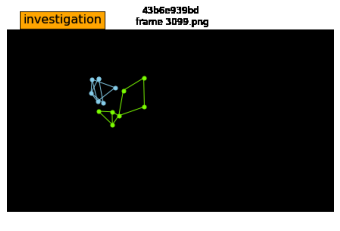

In [ ]:
keypoint_sequence = single_sequence['keypoints']
annotation_sequence = single_sequence['annotations']

ani = animate_pose_sequence(sequence_key,
                            keypoint_sequence, 
                            start_frame = 3000,
                            stop_frame = 3100,
                            annotation_sequence = annotation_sequence)

# Display the animaion on colab
ani

### Showing a section of the validation data (Index needs to be selected for a full video)

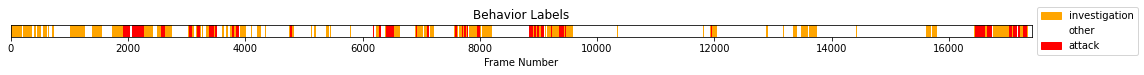

In [ ]:
annotation_sequence = single_sequence['annotations']
text_sequence = num_to_text(annotation_sequence)
 
plot_annotation_strip(
    text_sequence,
    start_frame=0,
    stop_frame=len(annotation_sequence) + 1000
)

# Basic EDA 🤓
There are 5 annotators in the train set, all of them label videos slightly differently, here we look at the percentages of each video annotator wise. Note the annotations from different annotators are **not** for the same videos.

Each sequence has different amounts of each behavior, here we get the percentage of frames of each behavior in each sequence. We can use this to split the dataset for validation in a stratified way.



In [ ]:
# Function for showing dataframes nicely on jupyter
from IPython.display import display, HTML
def pretty_print_dataframe(df):
  display(HTML(df.to_html()))

In [ ]:
vocabulary = train['vocabulary']
def get_percentage(sequence_key):
  anno_seq = num_to_text(train['sequences'][sequence_key]['annotations'])
  counts = {k: np.mean(np.array(anno_seq) == k) for k in vocabulary}
  return counts

anno_percentages = {k: get_percentage(k) for k in train['sequences']}

anno_perc_df = pd.DataFrame(anno_percentages).T
anno_perc_df['annotator_id'] = [seq['annotator_id'] for k, seq in train['sequences'].items()]
print("Percentage of frames in every sequence for every class")
for anno in anno_perc_df['annotator_id'].unique():
  pretty_print_dataframe(anno_perc_df[anno_perc_df['annotator_id'] == anno])

Percentage of frames in every sequence for every class


,attack,investigation,mount,other,annotator_id
43b6e939bd,0.112374,0.255067,0.000000,0.632558,1
5e11824914,0.000000,0.166901,0.311344,0.521754,1
e23a8798d2,0.000000,0.121332,0.193692,0.684975,1
9aa7834334,0.104795,0.228481,0.000000,0.666724,1
f636d8ce50,0.042356,0.407999,0.000000,0.549646,1
6ff4efa5af,0.000000,0.163359,0.267215,0.569426,1


,attack,investigation,mount,other,annotator_id
164fea19b9,0.000000,0.241118,0.128168,0.630714,2
d74df16abe,0.063488,0.453967,0.022614,0.459931,2
49a06c058d,0.074868,0.167778,0.001093,0.756260,2
8272b0514e,0.000000,0.290838,0.049824,0.659338,2
5b0c4bcc5b,0.000000,0.236804,0.026842,0.736354,2
a9797dafad,0.155806,0.120652,0.006901,0.716641,2


,attack,investigation,mount,other,annotator_id
37685eaeab,0.000000,0.182941,0.118722,0.698337,3
1d1fbf825b,0.000000,0.347086,0.117151,0.535763,3
dfc28b400a,0.000000,0.228521,0.348493,0.422986,3
3d85aa9112,0.077094,0.081905,0.002703,0.838298,3
468f81c924,0.102584,0.046779,0.000000,0.850637,3
92d65c5928,0.264395,0.053320,0.000000,0.682285,3


,attack,investigation,mount,other,annotator_id
55336c1c10,0.000000,0.424183,0.056618,0.519199,4
5dc3bea88e,0.000000,0.175984,0.112424,0.711592,4
f00a01799b,0.233328,0.006733,0.000000,0.759939,4
52ac2359fb,0.139976,0.030842,0.000000,0.829181,4
8060ae3dcf,0.107315,0.075904,0.000000,0.816781,4
37c778250f,0.000000,0.174082,0.089087,0.736831,4


,attack,investigation,mount,other,annotator_id
0cc9e91c16,0.036092,0.162057,0.000000,0.801851,5
ae2efcbabd,0.000000,0.188581,0.029831,0.781588,5
20bcf954d4,0.079431,0.266523,0.000000,0.654046,5
99af4715e3,0.039112,0.229705,0.000000,0.731183,5
f8e8e4a375,0.000000,0.448194,0.011593,0.540213,5
a104a6d76c,0.000000,0.345275,0.029140,0.625585,5


## Percentage Frames of all behaviors
Lets look at the class imbalance for every annotator

In [ ]:
for annotator_id in anno_perc_df['annotator_id'].unique():
  all_annotations = []
  for sk, sequence in train['sequences'].items():
    if not sequence['annotator_id'] == annotator_id:
      continue
    annotations = sequence['annotations']
    all_annotations.extend(list(annotations))
  all_annotations = num_to_text(all_annotations)
  classes, counts = np.unique(all_annotations, return_counts=True)
  print("Annotator: ", annotator_id)
  percentages = {"Behavior": classes, "Percentage Frames": counts/len(all_annotations)}
  pretty_print_dataframe(pd.DataFrame(percentages))

Annotator:  1


,Behavior,Percentage Frames
0,attack,0.032468
1,investigation,0.205776
2,mount,0.161987
3,other,0.599769


Annotator:  2


,Behavior,Percentage Frames
0,attack,0.052742
1,investigation,0.258164
2,mount,0.033984
3,other,0.655110


Annotator:  3


,Behavior,Percentage Frames
0,attack,0.080907
1,investigation,0.134947
2,mount,0.095047
3,other,0.689099


Annotator:  4


,Behavior,Percentage Frames
0,attack,0.086887
1,investigation,0.116234
2,mount,0.044560
3,other,0.752319


Annotator:  5


,Behavior,Percentage Frames
0,attack,0.030254
1,investigation,0.264150
2,mount,0.010272
3,other,0.695323


# Generate predictions 💪

In [ ]:
# Generating Random Predictions
submission = {}
test = np.load('data/test.npy',allow_pickle=True).item()
for sequence_id, sequence in test["sequences"].items():
  keypoint_sequence = sequence['keypoints']
  submission[sequence_id] = np.random.randint(4, size=len(sequence['keypoints']))

## Validate the submission ✅
The submssion should follow these constraints:

1.   It should be a dictionary
2.   It should be have same keys as sample_submission
3.   The lengths of the arrays are same
4.   All values are intergers

You can use the helper function below to check these



In [ ]:
def validate_submission(submission, sample_submission):
    if not isinstance(submission, dict):
      print("Submission should be dict")
      return False

    if not submission.keys() == sample_submission.keys():
      print("Submission keys don't match")
      return False
    
    for key in submission:
      sv = submission[key]
      ssv = sample_submission[key]
      if not len(sv) == len(ssv):
        print(f"Submission lengths of {key} doesn't match")
        return False
    
    for key, sv in submission.items():
      if not all(isinstance(x, (np.int32, np.int64, int)) for x in list(sv)):
        print(f"Submission of {key} is not all integers")
        return False
    
    print("All tests passed")
    return True

In [ ]:
validate_submission(submission, sample_submission)

All tests passed


True

## Save the prediction as `npy` 📨

In [ ]:
np.save("submission.npy", submission)

## Submit to AIcrowd 🚀

In [ ]:
!aicrowd submission create -c mabe-task-2-annotation-style-transfer -f submission.npy

submission.npy ━━━━━━━━━━━━━━━━━━━━━━ 100.0% • 65.4/65.4 MB • 2.6 MB/s • 0:00:00
                                                                    ╭─────────────────────────╮                                                                    
                                                                    │ Successfully submitted! │                                                                    
                                                                    ╰─────────────────────────╯                                                                    
                                                                          Important links                                                                          
┌──────────────────┬──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/multi-agent-behavior-representation-modelin